### Aşamalara chart print fonksiyonu koymaca.

In [1]:
import os
import pickle
import itertools
import pandas as pd

from matplotlib import colors
import matplotlib.pyplot as plt

from map_engine.map_generator import map

from quest_engine.quest_generator import *
from quest_engine.freytags_fitness import freytags

from encounter_engine.world_encounters import *

from character_engine.character import *

In [2]:
#nw = map()
#
#nw.populate_map(n_locations=1024, name="terrain", relaxed=True, k=100)
#nw.populate_map(n_locations=4096, name="civilisation", relaxed=True, k=250)
#nw.populate_map(n_locations=36, name="story_act", relaxed=True, k=250)
#nw.populate_map(n_locations=1024, name="threat", relaxed=True, k=100)
#
#nw.attribute_view(seed_1=24, seed_2=34,
#                  map_name="terrain", view_name="terrain")
#nw.attribute_view(seed_1=98, seed_2=50, map_name="civilisation",
#                  view_name="civilisation", double=False)
#nw.attribute_view(seed_1=34, seed_2=34, map_name="threat",
#                  view_name="threat", double=False)
#nw.attribute_view(seed_1=16, seed_2=16, map_name="story_act",
#                  view_name="story_act", double=False)
#
#nw.attribute_centroids("civilisation")
#nw.attribute_centroids("terrain")
##nw.land_mask()
#
#with open('logs/map_nw', 'wb') as f:
#    pickle.dump(nw, f)

with open("logs/map_nw", "rb") as f:
    nw = pickle.load(f)

nw.land_mask()

In [ ]:
pop = quest_pop(nw,act=0, pop_size=200, steps=5)
ind = pop.evolve(gens=1,early_stop=False, mu_p=.4, xo="pmx", mutation="random_point")

nw.printer(quest =ind)

In [ ]:
print(ind.path_threat)

ind.check_threat()

In [ ]:

muts = ["complete","single_point","random_point"]
xos = ["pmx","single_point","ar"]
mups =  [.5]

for param in [p for p in itertools.product(*[muts,xos,mups])]:

            params = {
                "map"           :   nw,
                "mutation"      :   param[0],
                "xo"            :   param[1],
                "mu_p"          :   param[2],
                "gens"          :   500,
                "shelf_size"    :   50,
                "pop_size"      :   100,
                "print_it"      :   False,
                "brute_force"   :   False,
                "log"           :   True,
                "early_stop"    :   True,
            }

            ql = quest_library(params)

In [3]:
params = {
                "map"           :   nw,
                "mutation"      :   "random_point",
                "xo"            :   "pmx",
                "mu_p"          :   .5,
                "gens"          :   500,
                "shelf_size"    :   1,
                "pop_size"      :   100,
                "print_it"      :   True,
                "brute_force"   :   False,
                "log"           :   False,
                "early_stop"    :   False,
            }

a = quest_library(params)

Best ind in gen 1 is -1467.4015404339184
Best ind in gen 2 is -233.77159793268297
Found the required individual on gen 2
Best ind in gen 1 is -6264.560919260574
Best ind in gen 2 is -6264.560919260574
Best ind in gen 3 is -5782.22621408388
Best ind in gen 4 is -5583.869334697413
Best ind in gen 5 is -3379.0831571040844
Best ind in gen 6 is -1593.9612529450048
Best ind in gen 7 is -3723.719096058685
Best ind in gen 8 is -5566.412888271445
Best ind in gen 9 is -3593.961252945005
Best ind in gen 10 is -3583.8693346974133
Best ind in gen 11 is -3583.8693346974133
Best ind in gen 12 is -1583.8693346974133
Best ind in gen 13 is -1583.8693346974133
Best ind in gen 14 is -1583.8693346974133
Best ind in gen 15 is -1583.8693346974133
Best ind in gen 16 is -1583.8693346974133
Best ind in gen 17 is -1583.8693346974133
Best ind in gen 18 is -583.8693346974133
Found the required individual on gen 18
Best ind in gen 1 is -8559.264525962446
Best ind in gen 2 is -8624.400968929422
Best ind in gen 3 is 

In [8]:
ql_1 = a.curate(quest_line_length=3, max_act=2, min_act=2)

Generation:  0
Fitness:  -1000
Generation:  1
Fitness:  -1000
Generation:  2
Fitness:  -1000
Generation:  3
Fitness:  -1000
Generation:  4
Fitness:  0
Found the required quest line on gen 5


/Users/cetiners/Desktop/Thesis/human_error/map_engine/map_generator.py:306: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


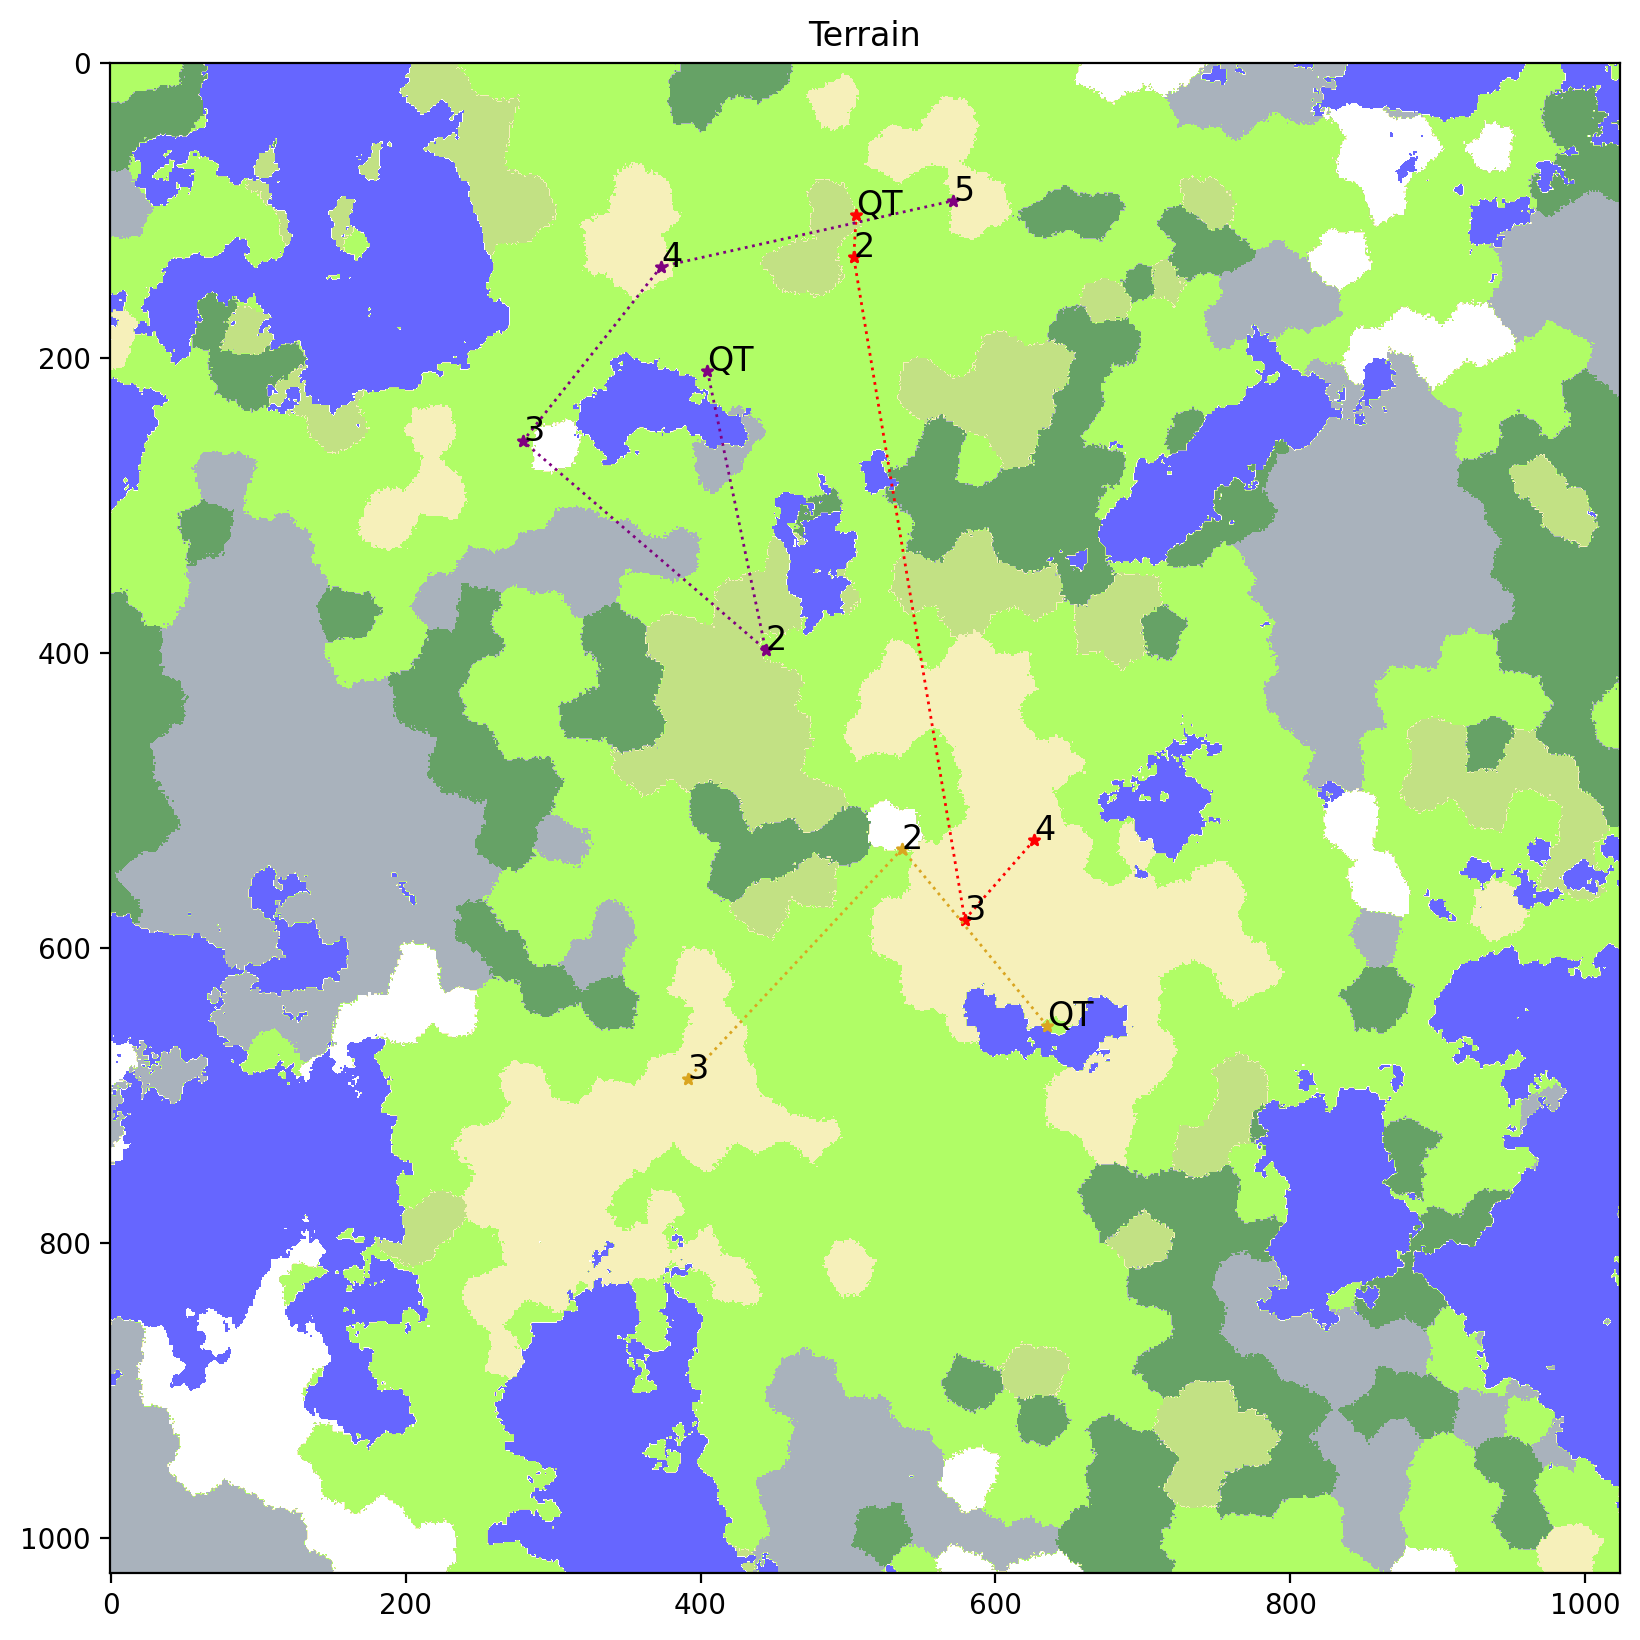

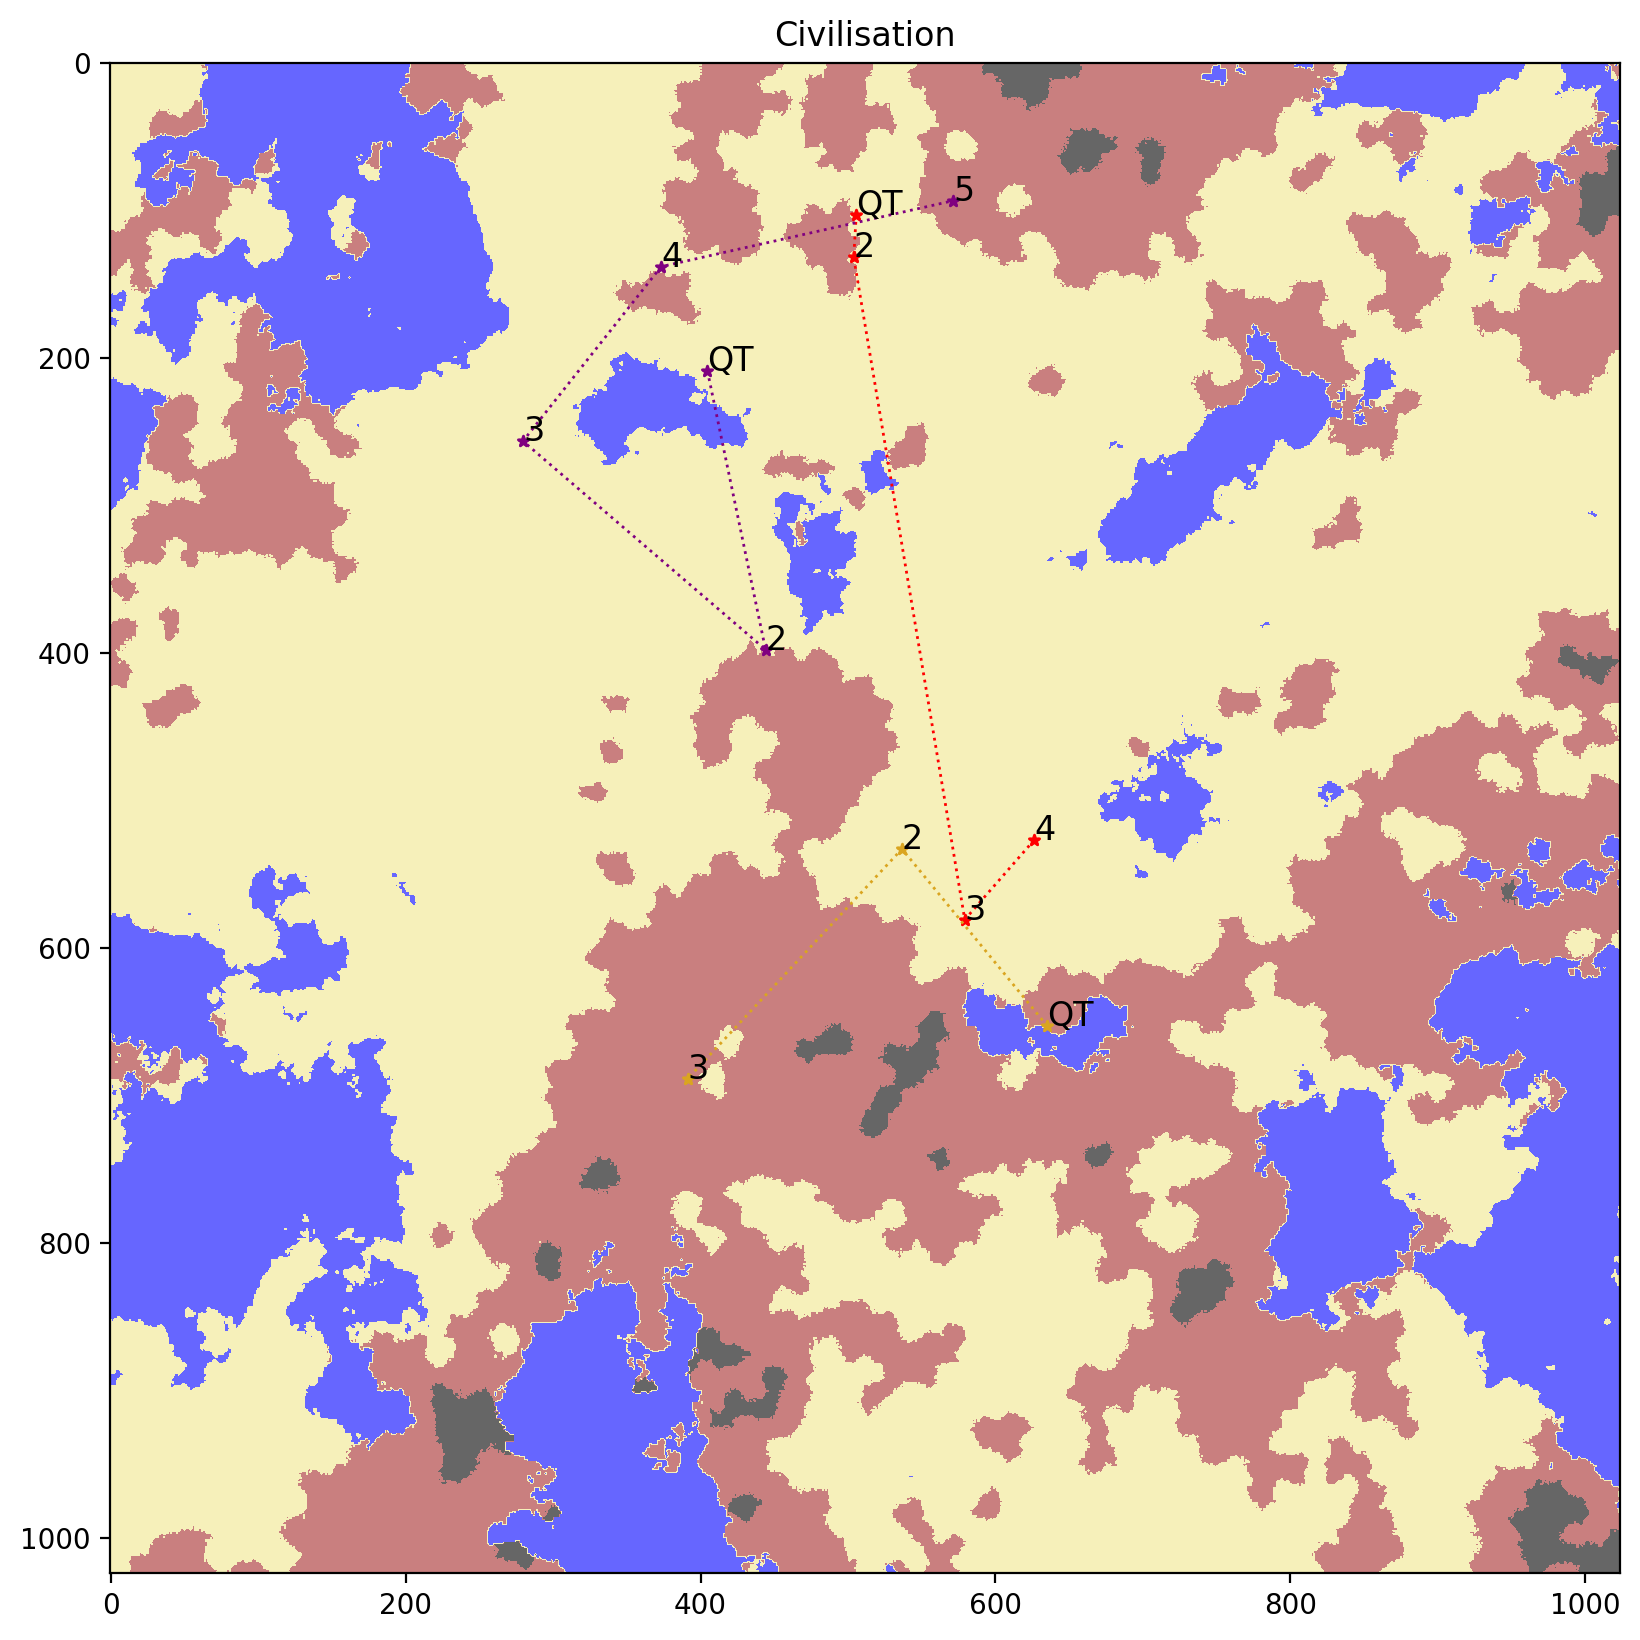

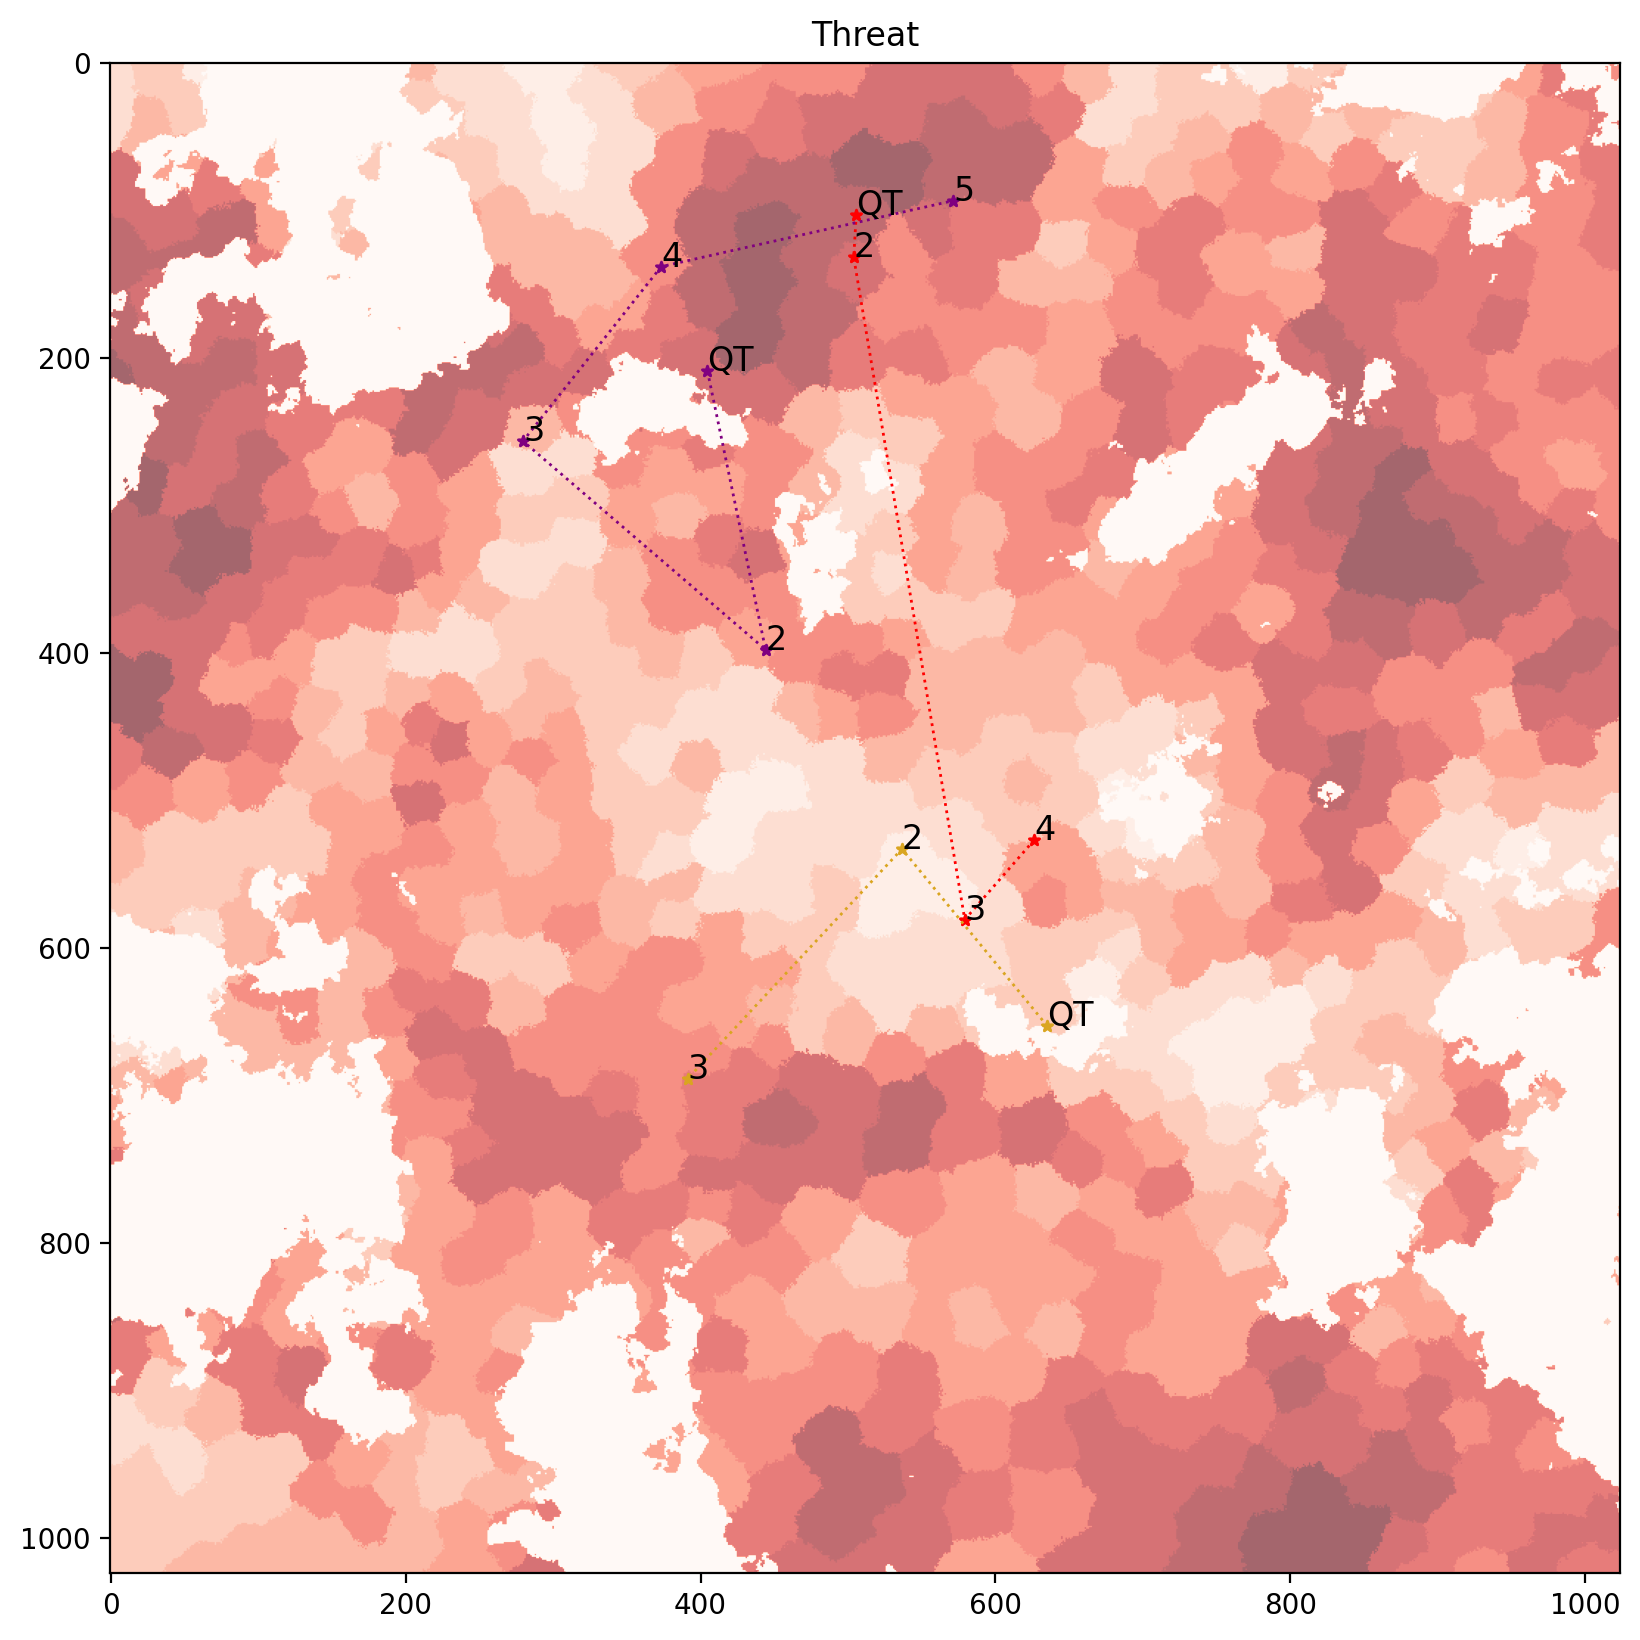

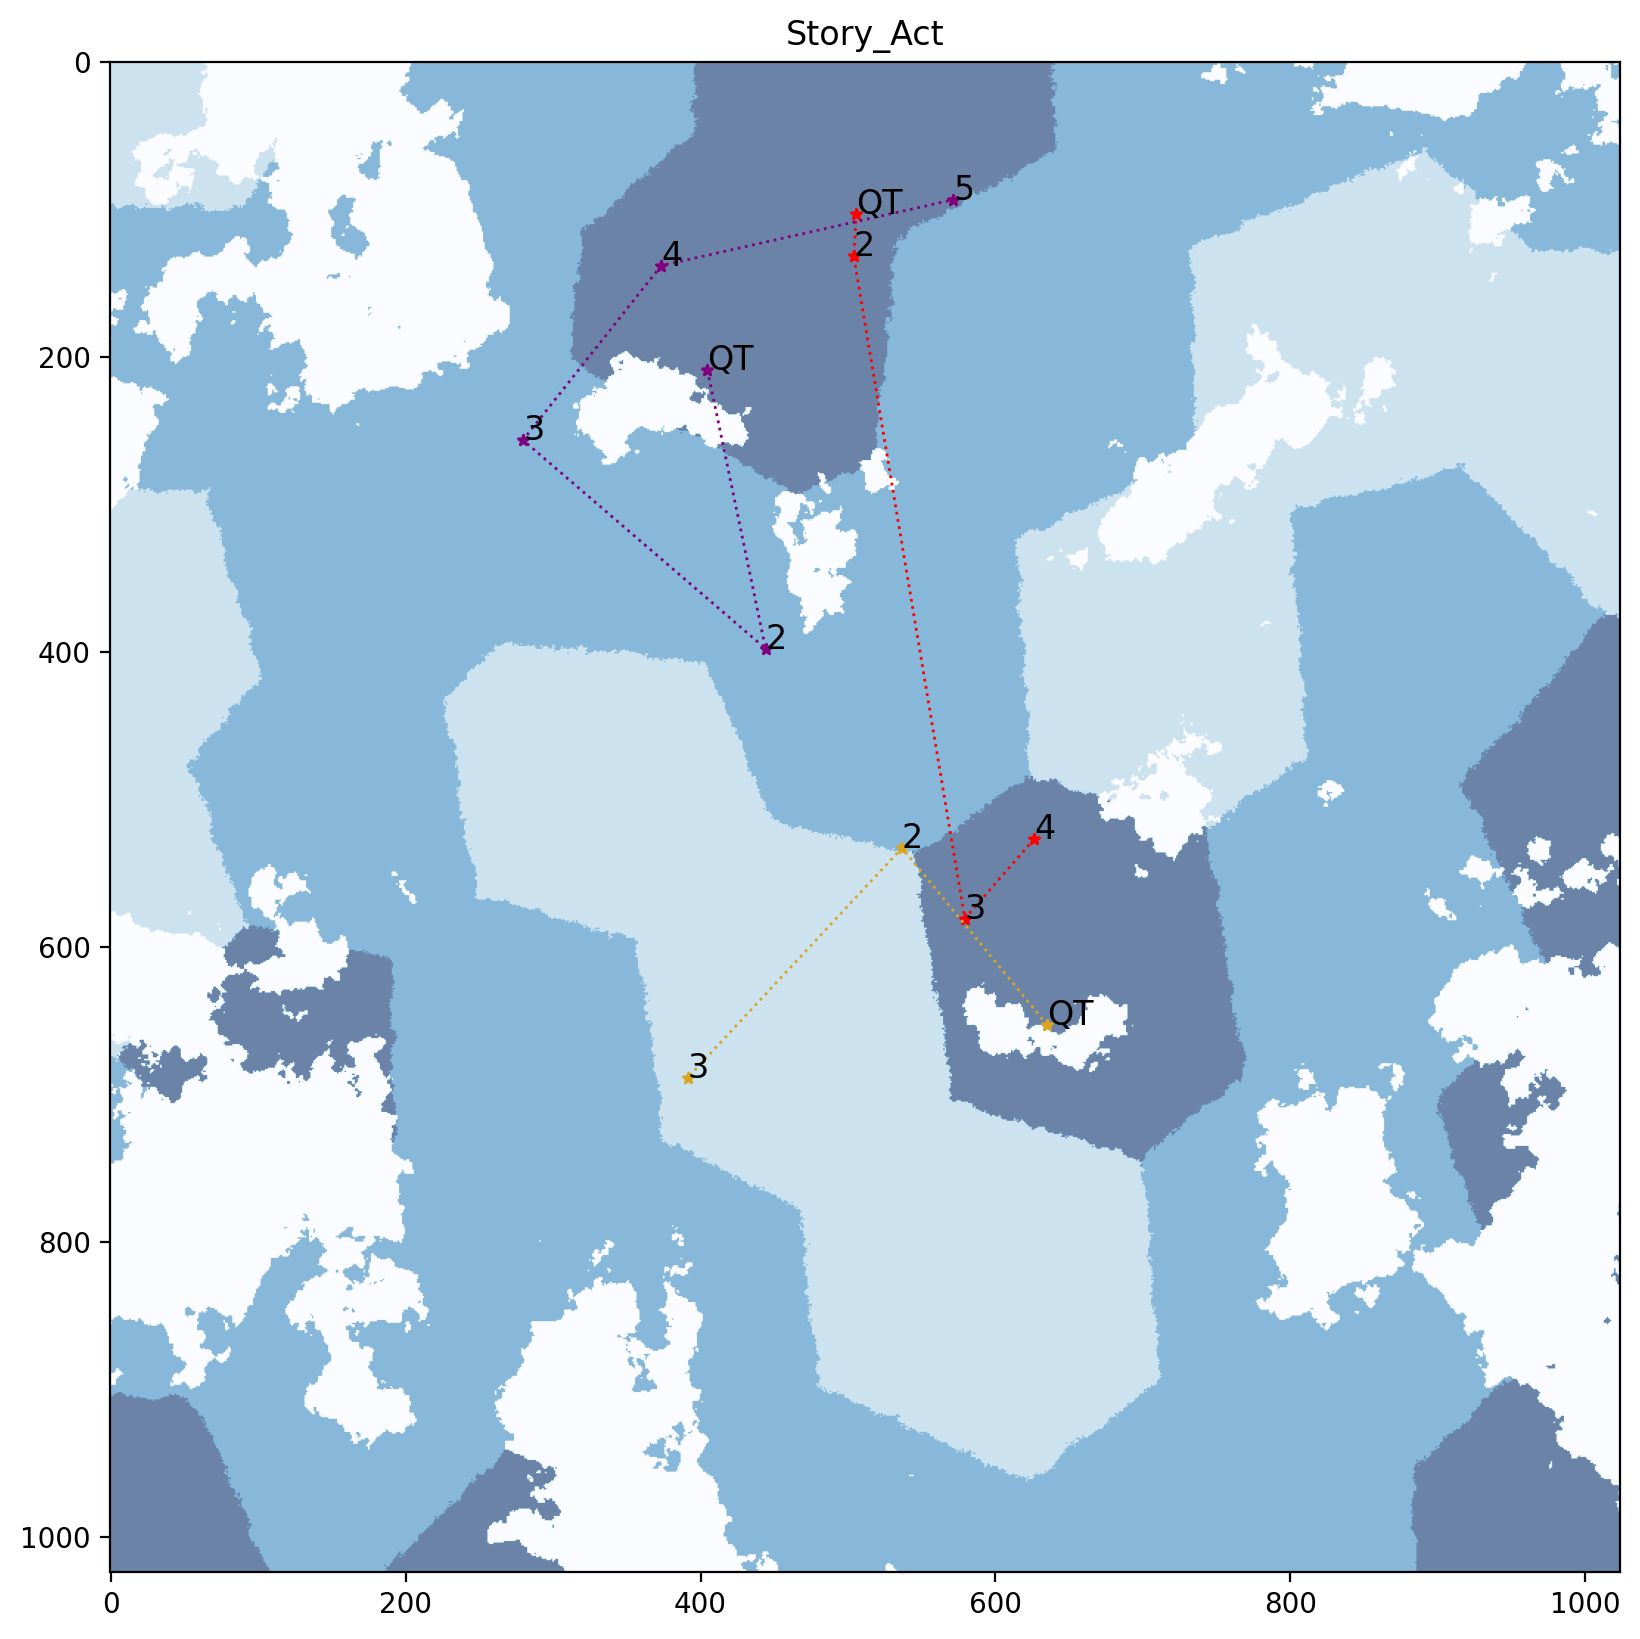

In [9]:
nw.printer(quest_line = ql_1)

In [ ]:

path = "logs/"
files = os.listdir(path)
files = [f for f in files if f.endswith(".csv")]

df = pd.concat([pd.read_csv(path+f) for f in files])


for f in files:
    os.remove(path+f)
    
df.to_csv("logs/merged.csv", index=False)




In [ ]:
#nw.land_mask()

x = [i[0] for i in pop.world_atlas]
y = [i[1] for i in pop.world_atlas]

x_1 = [i[0] for i in pop_1.world_atlas]
y_1 = [i[1] for i in pop_1.world_atlas]

cmap = colors.ListedColormap(
    ["blue","white", "yellowgreen", "khaki", "lawngreen", "slategrey", "darkgreen"])
cmap_arcs = colors.ListedColormap(
    ["blue", "khaki", "khaki", "khaki", "khaki", "khaki", "khaki", "brown", "brown", "brown", "black", ])

q_colors = ["red","goldenrod","purple","darkgreen","black"]

ter = nw.views["terrain"].copy()
civ = nw.views["civilisation"].copy()
thr = nw.views["threat"].copy()
arc = nw.views["story_act"].copy()

fig, ax = plt.subplots(2, 2)
fig.set_dpi(150)
fig.set_size_inches(15, 15)

ax[0, 1].imshow(ter.T, cmap=cmap, alpha=.66)
ax[0, 1].set_title("Terrain")
ax[0, 1].scatter(x, y, c="black", s=15)
ax[0, 1].scatter(x_1, y_1, c="red", s=15)
  

ax[1, 1].imshow(civ.T, cmap=cmap_arcs, alpha=0.66)
ax[1, 1].set_title("Civilisation")
ax[1, 1].scatter(x, y, c="black", s=15)
ax[1, 1].scatter(x_1, y_1, c="red", s=15)


ax[1, 0].imshow(thr.T, cmap="Reds", alpha=0.66)
ax[1, 0].set_title("Threat")
ax[1, 0].scatter(x, y, c="black", s=15)
ax[1, 0].scatter(x_1, y_1, c="red", s=15)


ax[0, 0].imshow(arc.T, cmap="Blues", alpha=0.66)
ax[0, 0].set_title("Story Act")
ax[0, 0].scatter(x, y, c="black", s=15)
ax[0, 0].scatter(x_1, y_1, c="red", s=15)



fig.show()


In [ ]:
dc = {"a" : 2, "b" : 2}

In [14]:
nw.meta.keys()

dict_keys(['initial_centroids', 'relaxed_centroids', 'unblurred', 'final', 'sea_mask'])

Text(0.5, 1.0, 'final')

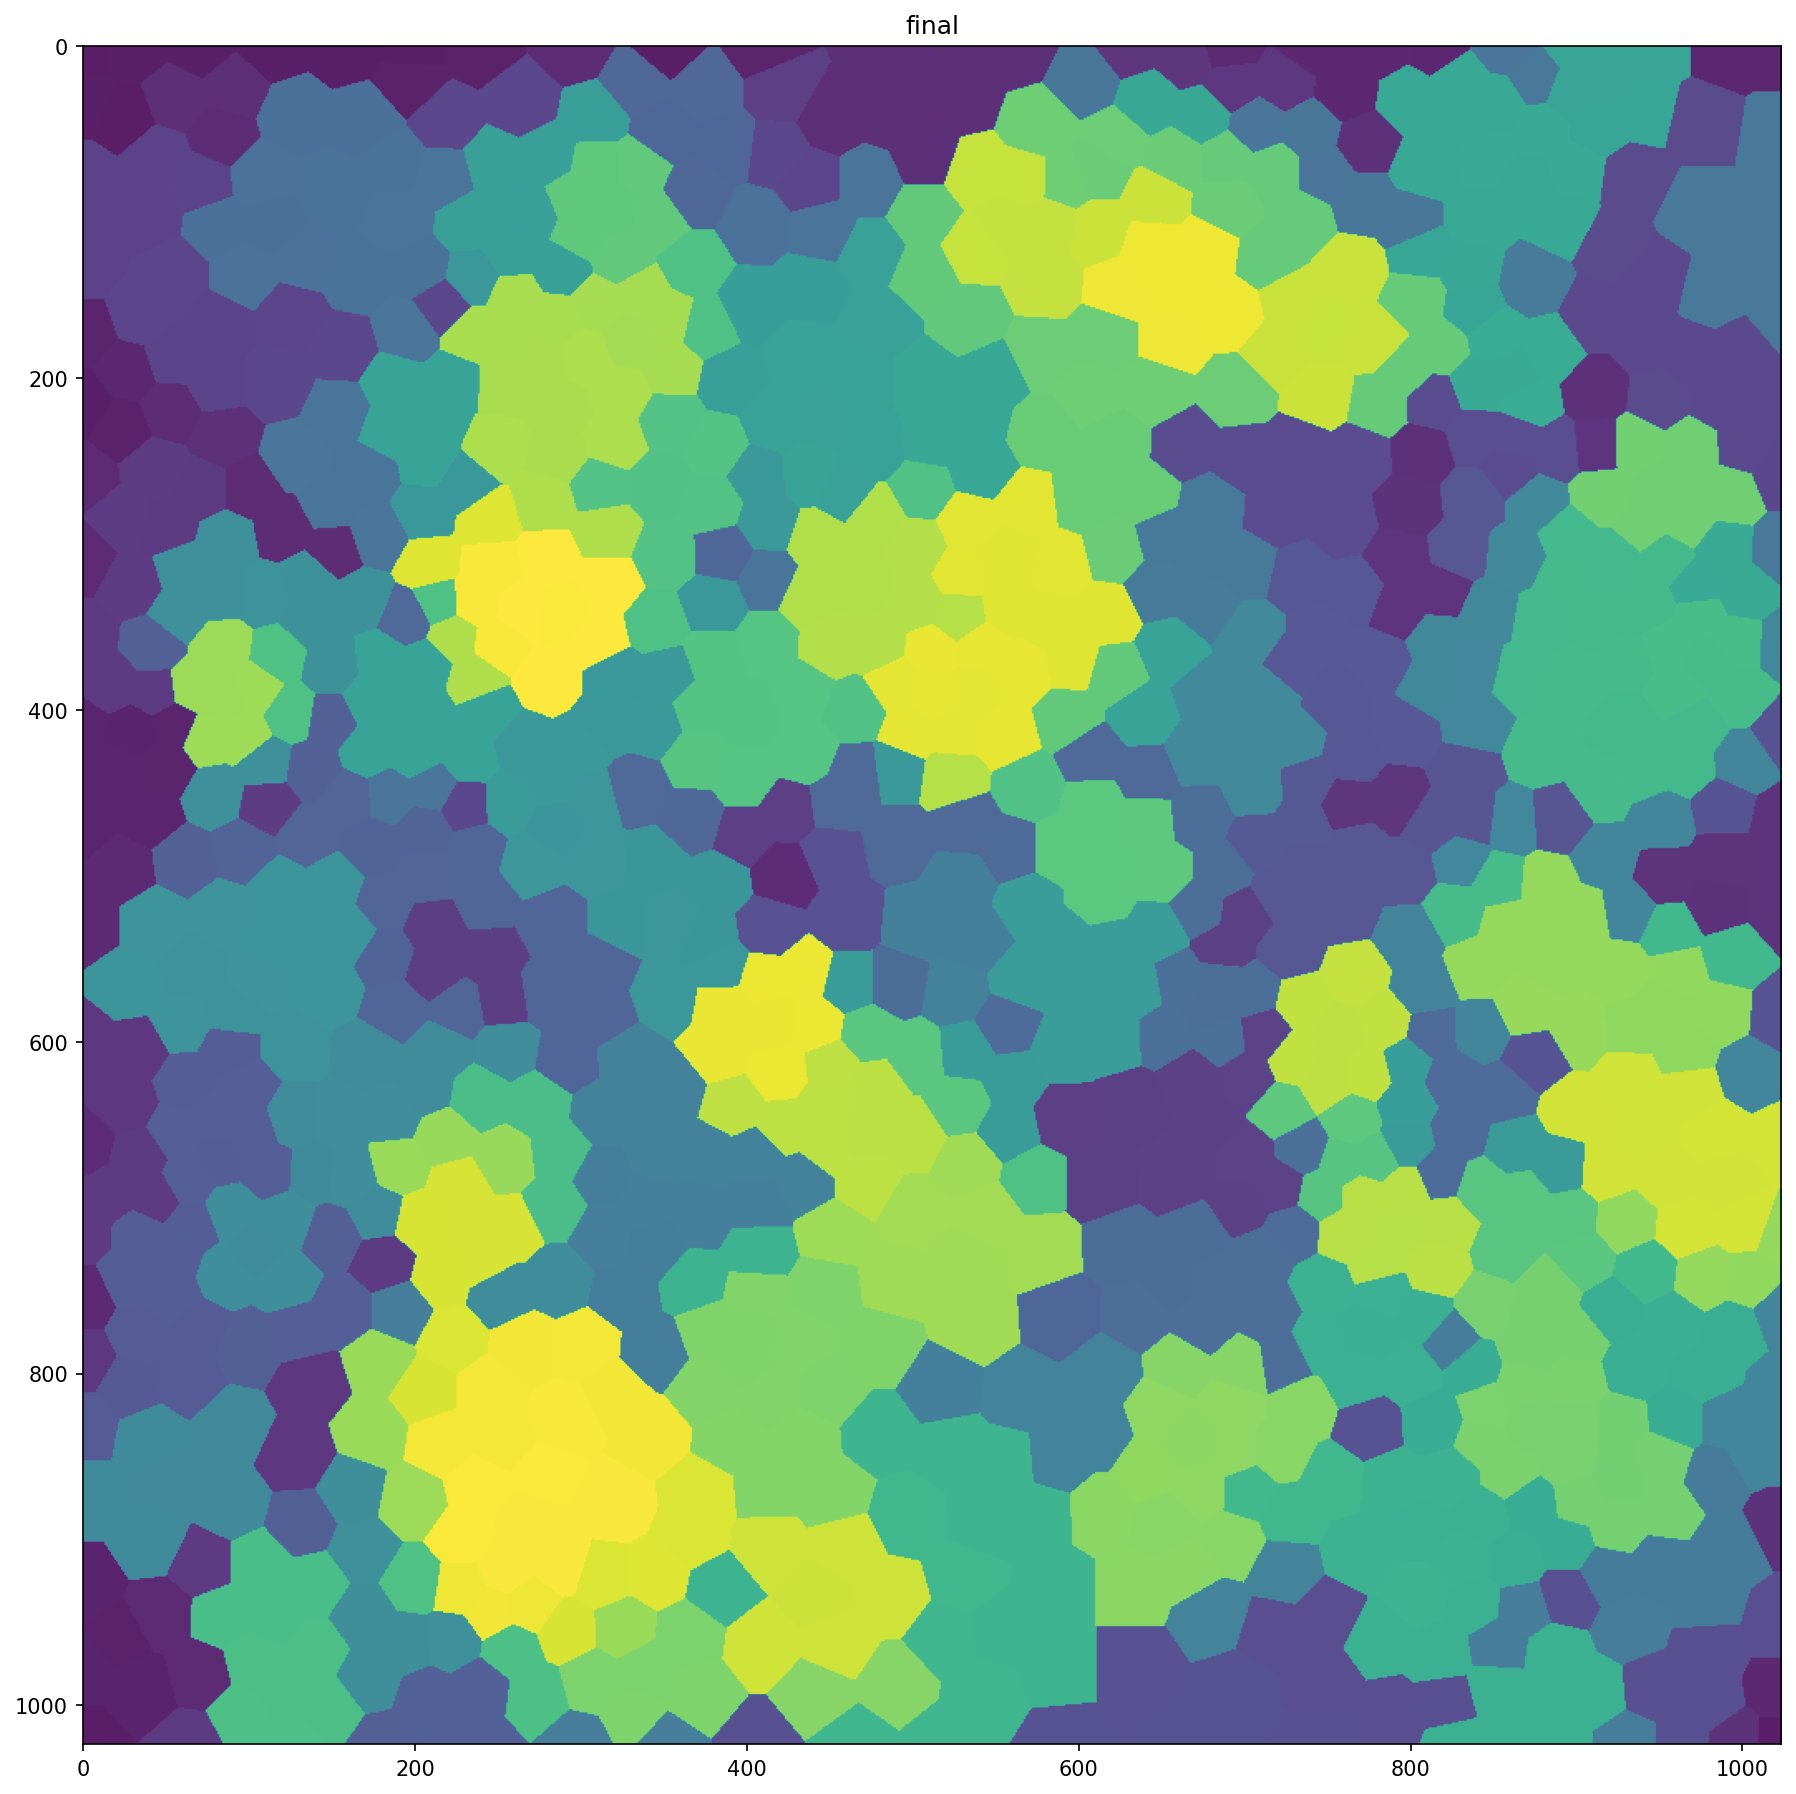

In [25]:

fig, ax = plt.subplots()
fig.set_dpi(150)
fig.set_size_inches(15, 15)
for a in ['unblurred', 'final']:
    ax.imshow(nw.meta[a].T, alpha=.66)
ax.set_title(a)
#ax.scatter(x, y, c="black", s=15)
#ax.scatter(x_1, y_1, c="red", s=15)